In [2]:
import numpy as np
import pandas as pd

In [3]:
#check orders
ord_df = pd.read_csv('C:/DS/Springboard/1st_capstone_project/orders.csv')
ord_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [45]:
#check nan
ord_df["days_since_prior_order"].astype(float).isna().sum()

206209

In [12]:
#check unique values in each column
uni_count = [ord_df[column].nunique() for column in ord_df]
uni_count

[3421083, 206209, 3, 100, 7, 24, 31]

In [7]:
#check difference between prior, test and train
#user id count
ord_df.groupby('eval_set')['user_id'].nunique()

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [20]:
#check whether prior contain users in train and test
train_user = ord_df[ord_df['eval_set']=='train']['user_id'].unique()
test_user = ord_df[ord_df['eval_set']=='test']['user_id'].unique()
prior_user = ord_df[ord_df['eval_set']=='prior']['user_id'].unique()
prior_train_user = np.isin(prior_user,train_user).sum()
prior_test_user = np.isin(prior_user,test_user).sum()
print(prior_train_user)
print(prior_test_user)

131209
75000


In [11]:
#order id count
ord_df.groupby('eval_set')['order_id'].nunique()

eval_set
prior    3214874
test       75000
train     131209
Name: order_id, dtype: int64

In [21]:
#check whether prior contain orders in train and test
train_order = ord_df[ord_df['eval_set']=='train']['order_id']
test_order = ord_df[ord_df['eval_set']=='test']['order_id']
prior_train = ord_df[ord_df['eval_set']=='prior']['order_id'].isin(train_order).sum()
prior_test = ord_df[ord_df['eval_set']=='prior']['order_id'].isin(test_order).sum()
print(prior_test)
print(prior_train)

0
0


In [35]:
#check how many orders each customer make in the three datasets
count_eva = ord_df.groupby('eval_set').count()
count_days = ord_df[(ord_df['eval_set']=='prior')&(ord_df['days_since_prior_order'].isna())].count()
count_eva

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
eval_set,,,,,,
prior,3214874,3214874,3214874,3214874,3214874,3008665
test,75000,75000,75000,75000,75000,75000
train,131209,131209,131209,131209,131209,131209


C:\Users\cfuth\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


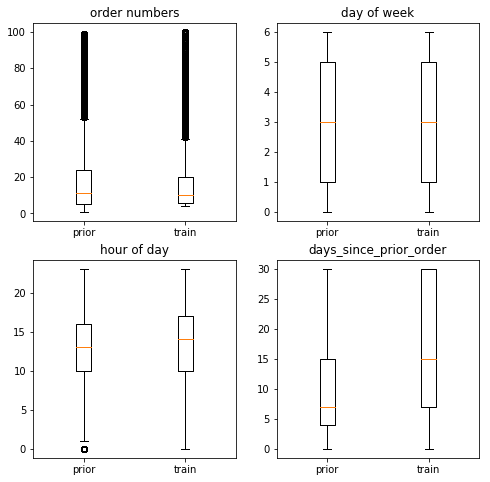

In [42]:
#box plot to show whether there are outliners
fig = plt.figure(figsize=(8,8))
a = fig.add_subplot(221)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_number'],ord_df[ord_df['eval_set']=='train']['order_number']])
a.set_xticks([1,2])
a.set_xticklabels(['prior','train'])
a.set_title('order numbers')

b = fig.add_subplot(222)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_dow'],ord_df[ord_df['eval_set']=='train']['order_dow']])
b.set_xticks([1,2])
b.set_xticklabels(['prior','train'])
b.set_title('day of week')

c = fig.add_subplot(223)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['order_hour_of_day'],ord_df[ord_df['eval_set']=='train']['order_hour_of_day']])
c.set_xticks([1,2])
c.set_xticklabels(['prior','train'])
c.set_title('hour of day')

d = fig.add_subplot(224)
plt.boxplot([ord_df[ord_df['eval_set']=='prior']['days_since_prior_order'].dropna(),ord_df[ord_df['eval_set']=='train']['days_since_prior_order']])
d.set_xticks([1,2])
d.set_xticklabels(['prior','train'])
d.set_title('days_since_prior_order')
plt.show()

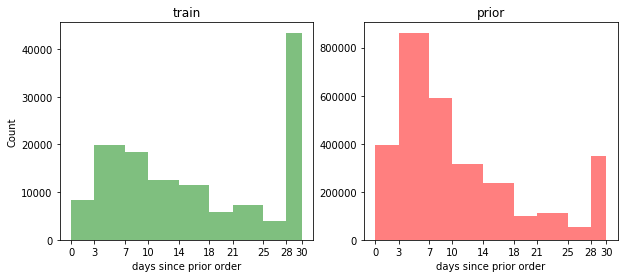

In [30]:
#check days to prior order distribution 
import matplotlib.pyplot as plt
bins = [0,3,7,10,14,18,21,25,28,30]
xlabels = [str(b) for b in bins]
fig = plt.figure(figsize=(10,4))
a = fig.add_subplot(121)
plt.hist(ord_df[ord_df['eval_set']=='train']['days_since_prior_order'],bins=bins,facecolor='g',alpha=0.5)
a.set_xticks(bins)
a.set_xticklabels(xlabels)
a.set_title('train')
a.set_xlabel('days since prior order')
a.set_ylabel('Count')

b = fig.add_subplot(122)
plt.hist(ord_df[ord_df['eval_set']=='prior']['days_since_prior_order'].dropna(),bins=bins,facecolor='r',alpha=0.5)
b.set_title('prior')
b.set_xticks(bins)
b.set_xticklabels(xlabels)
b.set_xlabel('days since prior order')

plt.show()

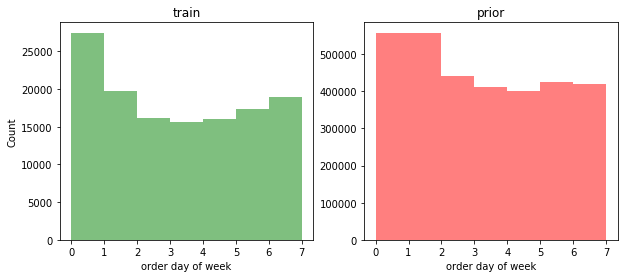

In [37]:
#check day of week distribution 
bins = np.arange(0,8,1)
fig = plt.figure(figsize=(10,4))
a = fig.add_subplot(121)
plt.hist(ord_df[ord_df['eval_set']=='train']['order_dow'],bins=bins,facecolor='g',alpha=0.5)
a.set_title('train')
a.set_xlabel('order day of week')
a.set_ylabel('Count')

b = fig.add_subplot(122)
plt.hist(ord_df[ord_df['eval_set']=='prior']['order_dow'],bins=bins,facecolor='r',alpha=0.5)
b.set_title('prior')
b.set_xlabel('order day of week')

plt.show()

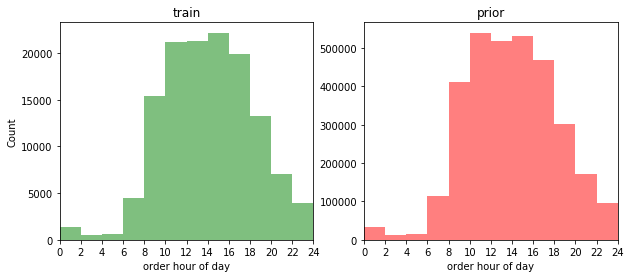

In [40]:
#check hour of day distribution
bins = np.arange(0,25,2)
xlabels = [str(b) for b in bins]
fig = plt.figure(figsize=(10,4))
a = fig.add_subplot(121)
plt.hist(ord_df[ord_df['eval_set']=='train']['order_hour_of_day'],bins=bins,facecolor='g',alpha=0.5)
a.set_title('train')
a.set_xlabel('order hour of day')
a.set_xlim(0,24)
a.set_xticks(bins)
a.set_xticklabels(xlabels)
a.set_ylabel('Count')

b = fig.add_subplot(122)
plt.hist(ord_df[ord_df['eval_set']=='prior']['order_hour_of_day'],bins=bins,facecolor='r',alpha=0.5)
b.set_title('prior')
b.set_xlim(0,24)
b.set_xticks(bins)
b.set_xticklabels(xlabels)
b.set_xlabel('order hour of day')

plt.show()

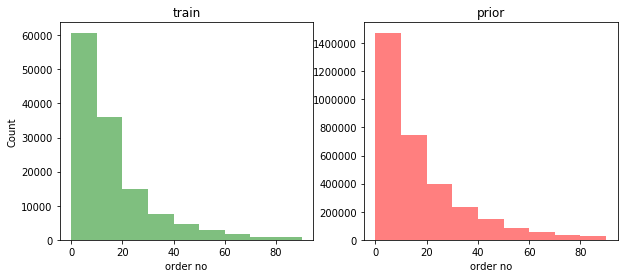

In [36]:
#check how many orders each customer make in the prior and train datasets
#plot histogram of order
bins = np.arange(0,100,10)
fig = plt.figure(figsize=(10,4))
a = fig.add_subplot(121)
plt.hist(ord_df[ord_df['eval_set']=='train']['order_number'],bins=bins,facecolor='g',alpha=0.5)
a.set_title('train')
a.set_xlabel('order no')
a.set_ylabel('Count')

b = fig.add_subplot(122)
plt.hist(ord_df[ord_df['eval_set']=='prior']['order_number'],bins=bins,facecolor='r',alpha=0.5)
b.set_title('prior')
b.set_xlabel('order no')

plt.show()